# <center>Analyse des ventes d'une librairie</center>

# <center>Demandes d'Antoine --> Analyse des différents indicateurs de vente</center>

*Antoine indique dans son mail:*

*Dans un premier temps, je vais avoir besoin de différents indicateurs et graphiques autour du chiffre d'affaires.*

*Peux-tu également regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ?*

*l serait également intéressant de faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc.*

*Enfin, j’aimerais avoir quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.*

*Après, toutes les informations et tous graphiques qui apporteraient de l’information pertinente sont les bienvenus !*

## Importation des librairies

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des dataset

In [2]:
customers_bis = pd.read_csv("customers_bis.csv")

products = pd.read_csv("products.csv")

transactions = pd.read_csv("transactions.csv")

df = pd.read_csv("df.csv")

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

***

***

## <center>Différents indicateurs et graphiques autour du chiffre d'affaires.</center>

In [4]:
dfcopy = df.copy()

In [5]:
dfcopy["price"].sum()

11856820.47

In [6]:
ca_categ = pd.crosstab(dfcopy['price'].sum(), dfcopy['categ'], dfcopy["price"], aggfunc = "sum")

In [7]:
ca_categ

categ,0.0,1.0,2.0
row_0,,,
11856820.47,4422822.76,4653722.69,2780275.02


<AxesSubplot:xlabel='categ'>

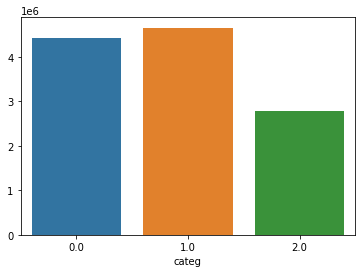

In [8]:
sns.barplot(data=ca_categ)

In [9]:
ca_sex = pd.crosstab(dfcopy['price'].sum(), dfcopy['sex'], dfcopy["price"], aggfunc = "sum")

In [10]:
ca_sex

sex,f,m
row_0,,
11856820.47,5861319.96,5995500.51


<AxesSubplot:xlabel='sex'>

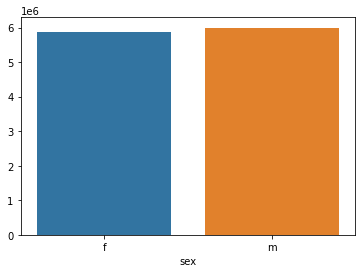

In [11]:
sns.barplot(data=ca_sex)

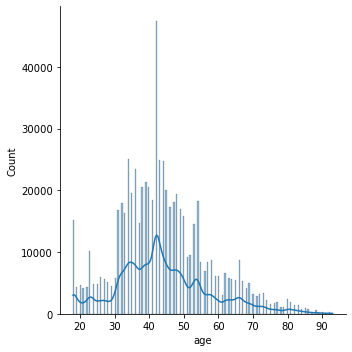

In [12]:
sns.displot(data=df, x="age", kde=True)

In [13]:
df["age"].value_counts()

42    47413
34    25005
43    24893
44    24677
36    23475
      ...  
90      311
87      272
92      226
93      201
91      170
Name: age, Length: 76, dtype: int64

In [14]:
def age_range(age):
    step = [
        {'range': (17,25), 'val': '17-25'},
        {'range': (26,30), 'val': '26-30'},
        {'range': (31,40), 'val': '31-40'},
        {'range': (41,50),'val': '41-50'},
        {'range': (51,60),'val': '51-60'},
        {'range': (61,70),'val': '61-70'},
        {'range': (71,80),'val': '71-80'},
        {'range': (81,93),'val': '81-93'}]

    for i in step:
        if i['range'][0] <= age <= i['range'][1]:
            return i['val']

df['ages_range'] = df['age'].apply(age_range)

In [15]:
dfcopy = df.copy()

In [16]:
ca_ages_range = pd.crosstab(dfcopy['price'].sum(), dfcopy['ages_range'], dfcopy["price"], aggfunc = "sum")

In [17]:
ca_ages_range

ages_range,17-25,26-30,31-40,41-50,51-60,61-70,71-80,81-93
row_0,,,,,,,,
11856820.47,2190922.55,1103999.59,2600436.01,2938799.87,1614365.51,892219.99,359283.61,156793.34


<AxesSubplot:xlabel='ages_range'>

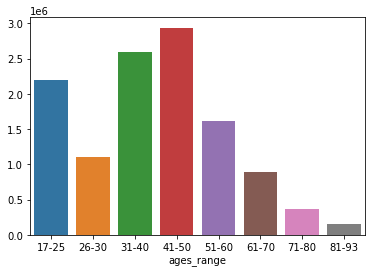

In [18]:
sns.barplot(data=ca_ages_range)

#### *RECAP*

#### *Le CA total est de 11 856 820.47 €.*
#### *La catégorie qui a la plus grande part du CA est la 1 ensuite la 0 et enfin la 2.*
#### *Les hommes représente une plus grande part du CA que les femmes mais la différence est petite.*
#### *Les 41-50 et les 31-40 représente la plus grande part du CA, suivit des 17-25.*

***

***

## <center>Evolution dans le temps du CA + Décomposition en moyenne mobile pour évaluer la tendence globale.</center>

In [19]:
# Creation du dataframe comprennant juste les dates et les prix.
df["date"]= pd.to_datetime(df["date"])
dp = df.copy()
dpbis = df.copy()
dp.drop(["id_prod", "session_id", "client_id", "sex", "birth", "categ", "hours", "minutes", "day", "month", "year", "age", "ages_range"], axis = 1, inplace = True)
dpbis.drop(["id_prod", "session_id", "client_id", "sex", "birth", "categ", "hours", "minutes", "day", "month", "year", "age"], axis = 1, inplace = True)
# Colonne "date" transformé en index (cela permet de faire de la timeseries analysis).
dp = dp.set_index('date')
dpbis = dpbis.set_index('date')
dp.index

DatetimeIndex(['2022-05-20 13:21:29.043970', '2022-02-02 07:55:19.149409',
               '2022-06-18 15:44:33.155329', '2021-06-24 04:19:29.835891',
               '2023-01-11 08:22:08.194479', '2022-10-20 15:59:16.084030',
               '2022-06-03 04:45:09.871601', '2021-06-26 14:48:55.311418',
               '2022-12-27 12:27:40.641366', '2021-11-29 15:54:25.880121',
               ...
               '2023-01-22 22:16:26.075669', '2022-01-30 06:17:15.265379',
               '2021-10-08 07:55:52.347300', '2022-12-14 13:18:29.143723',
               '2022-03-18 21:34:28.596252', '2022-01-15 13:05:06.246925',
               '2022-03-19 16:03:23.429229', '2022-12-20 04:33:37.584749',
               '2021-07-16 20:36:35.350579', '2022-09-28 01:12:01.973763'],
              dtype='datetime64[ns]', name='date', length=679332, freq=None)

### Evolution du CA par années

[Text(0, 0, '2021'), Text(1, 0, '2022'), Text(2, 0, '2023')]

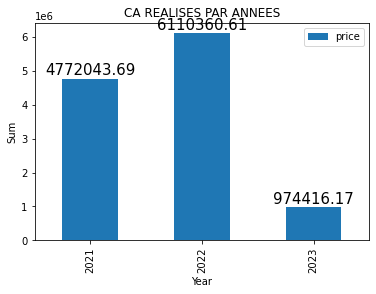

In [20]:
year = dp.resample("Y").sum().plot(kind = "bar")
for bar in year.patches:
    year.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')
year.set_xlabel('Year')
year.set_ylabel('Sum')
year.set_title("CA REALISES PAR ANNEES")
year.set_xticklabels(["2021","2022","2023"])

### Evolution du CA à travers les trimestres

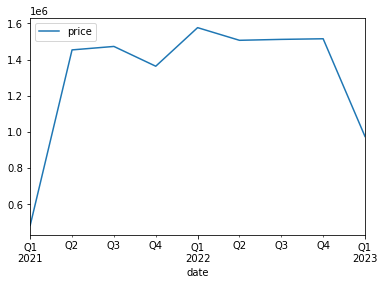

In [21]:
quarter = dp.resample("Q").sum().plot(kind = "line")

<AxesSubplot:xlabel='date'>

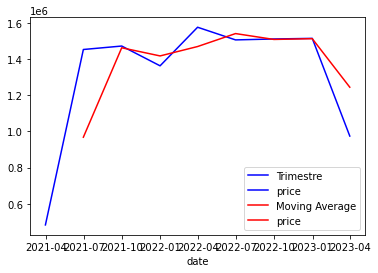

In [22]:
q = dp.resample("Q").sum()
rq = q.rolling(window = 2, center = True).mean()
sns.lineplot(data = q, palette=['b'], label = "Trimestre")
sns.lineplot(data = rq, palette=['r'], label = "Moving Average")

### Evolution du CA à travers les mois

In [23]:
year_month_amount = pd.crosstab(dfcopy.month, dfcopy.year, values = dfcopy.price, aggfunc = "sum")

In [24]:
year_month_amount

year,2021,2022,2023
month,,,
1,NaN,525408.94,517638.48
2,NaN,535725.39,456777.69
3,482566.52,515610.42,NaN
4,476305.16,493194.80,NaN
5,493055.39,517356.44,NaN
6,484186.49,496114.05,NaN
7,482891.36,510951.00,NaN
8,482410.70,506579.19,NaN
9,507408.56,494240.44,NaN


<AxesSubplot:xlabel='month'>

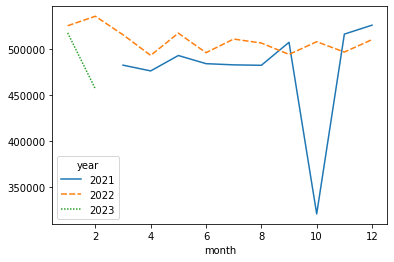

In [25]:
sns.lineplot(data = year_month_amount)

*En regardant les CA par mois à travers les années, on ce rends compte que seul l'année 2022 est complète, 2021 commence à partir de mars et 2023 s'arrête en février.*

In [26]:
# CA par années / mois / catégories

categ0 = dfcopy[dfcopy["categ"]==0.0]
categ0

categ1 = dfcopy[dfcopy["categ"]==1.0]
categ1

categ2 = dfcopy[dfcopy["categ"]==2.0]
categ2

yoyo0 = pd.crosstab(categ0.month, categ0.year, values = categ0.price, aggfunc = "sum")

yoyo1 = pd.crosstab(categ1.month, categ1.year, values = categ1.price, aggfunc = "sum")

yoyo2 = pd.crosstab(categ2.month, categ2.year, values = categ2.price, aggfunc = "sum")

In [27]:
yoyo0, yoyo1, yoyo2

(year        2021       2022       2023
 month                                 
 1            NaN  164280.46  181380.99
 2            NaN  183351.22  162554.93
 3      193755.08  191618.83        NaN
 4      205418.32  175193.12        NaN
 5      196298.64  195096.18        NaN
 6      168041.08  184032.79        NaN
 7      144806.75  187264.88        NaN
 8      167863.53  177484.68        NaN
 9      246521.79  183455.15        NaN
 10     199348.76  187569.07        NaN
 11     156049.46  184748.24        NaN
 12     206134.17  180554.64        NaN,
 year        2021       2022       2023
 month                                 
 1            NaN  256267.92  210104.41
 2            NaN  213120.64  180347.24
 3      186974.17  206485.26        NaN
 4      156138.35  195263.97        NaN
 5      165893.40  205532.63        NaN
 6      189162.04  201912.06        NaN
 7      188523.27  193969.72        NaN
 8      162991.38  211360.09        NaN
 9      190613.78  195379.54        NaN

In [28]:
#year = dp.resample("M").sum().plot(kind = "bar")
#plt.figure(figsize=(25, 25))
#for bar in year.patches:
#    year.annotate(format(bar.get_height(), '.2f'),
#                       (bar.get_x() + bar.get_width() / 2,
#                        bar.get_height()), ha='center', va='center',
#                       size=15, xytext=(0, 8),
#                       textcoords='offset points')
#year.set_xlabel('Mois')
#year.set_ylabel('Sum')
#year.set_title("CA REALISES PAR MOIS")
#year.set_xticklabels(["Mars21","Avril21","Mai21", "Juin21", "Juillet21", "Août21", "Septembre21", "Octobre21", "Novembre21", "Décembre21", 
#                     "Janvier22" ,"Février22", "Mars22","Avril22","Mai22", "Juin22", "Juillet22", "Août22", "Septembre22", "Octobre22", "Novembre22", "Décembre22", 
#                     "Janvier23" ,"Février23"])

Text(0.5, 1.0, 'CA REALISES PAR MOIS')

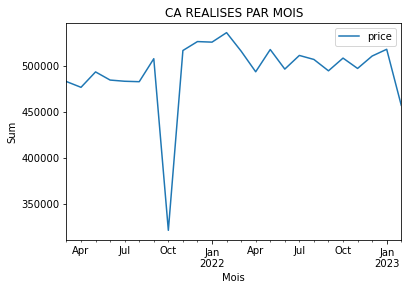

In [29]:
month = dp.resample("M").sum().plot(kind = "line")
month.set_xlabel('Mois')
month.set_ylabel('Sum')
month.set_title("CA REALISES PAR MOIS")

<AxesSubplot:xlabel='date'>

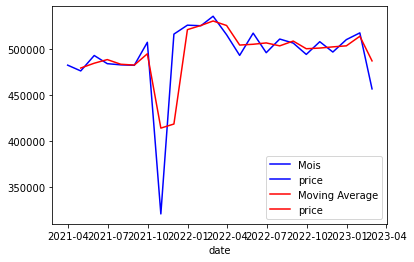

In [30]:
mm = dp.resample("M").sum()
rm = mm.rolling(window = 2, center = True).mean()
sns.lineplot(data = mm, palette=['b'], label = "Mois")
sns.lineplot(data = rm, palette=['r'], label = "Moving Average")

*L'on peut voir qu'il y a eu une grosse chute du CA entre 09/21 et 10/21 et qu'il y a eu une grosse remontée en 11/21.*

***A quoi cela est-il dû ?***

<AxesSubplot:xlabel='month'>

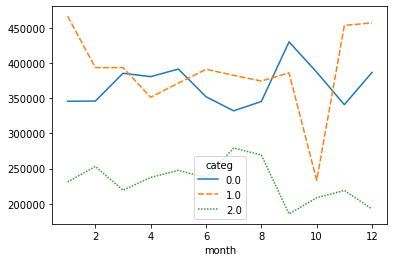

In [31]:
ca_categ_amount = pd.crosstab(dfcopy.month, dfcopy.categ, values = dfcopy.price, aggfunc = "sum")
sns.lineplot(data=ca_categ_amount)

*On peut constater que le problème viendrais surement de la catégorie 1.*

<AxesSubplot:xlabel='month'>

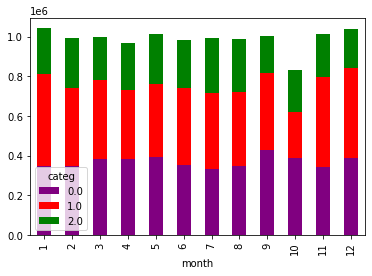

In [32]:
ca_categ_amount_stacked = pd.crosstab(dfcopy.month, dfcopy.categ, values = dfcopy.price, aggfunc = "sum")
ca_categ_amount_stacked.plot(kind='bar', stacked=True, color=['purple', 'red', 'green'])

In [33]:
categ1copy = categ1.copy()
categ1copy["date"]= pd.to_datetime(categ1copy["date"])
categ1copy = categ1copy.set_index('date')

In [34]:
az2021 = categ1copy["2021-10-01" : "2021-10-31"]
az2021
ctaz2021 = pd.crosstab(az2021.day, az2021.categ, values = az2021.price, aggfunc = "sum")
ctaz2021

C:\Users\DJAMEL~1\AppData\Local\Temp/ipykernel_17116/393505102.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  az2021 = categ1copy["2021-10-01" : "2021-10-31"]


categ,1.0
day,
1,7003.79
28,6317.99
29,6425.18
30,6753.69
31,7261.67


*Le mois d'octobre 2021 ne comporte pas de valeurs pour la période du 2 au 27.*

*Cette information nous explique pourquoi l'on ce retrouve au mois d'octobre à avoir une grosse chute du CA.*

*Il faut bien garder en tête l'absence de transactions durant la période du 2 au 27 ocotbre 2021 pour la suite de l'analyse.*

*En regardant  par catégories l'on voit que la catégorie 1 chute énormément en octobre, la catégorie 0 un peu aussi, mais la 2 augemente légerement.*

*La catégorie 1 qui est celle qui représente le plus de CA  dans sa chute elle impact donc grandement le CA.*

*La catégorie 0 est la deuxième plus significative en terme de CA (elle suit d'assez près la catégorie 1), chute aussi en octobre, de manière moindre mais suffisament pour enfoncer encore un peu plus le clou.*

*La catégorie avait sur les mois précedent chutée et sa remonté sur octobre est très faible.*

*Et la grosse remonté du CA est faite par la catégorie 1.*

<AxesSubplot:xlabel='month'>

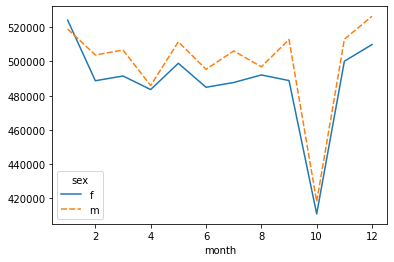

In [35]:
ca_sex_amount = pd.crosstab(dfcopy.month, dfcopy.sex, values = dfcopy.price, aggfunc = "sum")
sns.lineplot(data=ca_sex_amount)

<AxesSubplot:xlabel='month'>

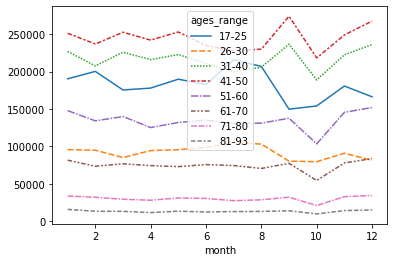

In [36]:
ca_age_amount = pd.crosstab(dfcopy.month, dfcopy.ages_range, values = dfcopy.price, aggfunc = "sum")
sns.lineplot(data=ca_age_amount)

### Evolution du CA à travers les semaines

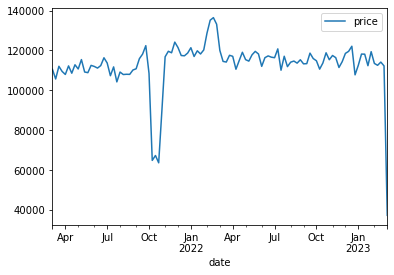

In [37]:
weeks = dp.resample("W").sum().plot(kind = "line")

<AxesSubplot:xlabel='date'>

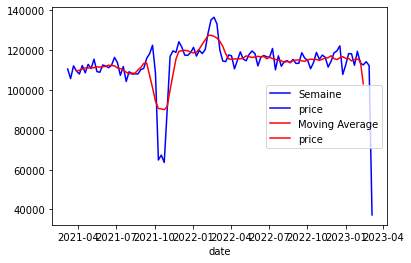

In [38]:
w = dp.resample("w").sum()
rw = w.rolling(window = 7, center = True).mean()
sns.lineplot(data = w, palette=['b'], label = "Semaine")
sns.lineplot(data = rw, palette=['r'], label = "Moving Average")

### Evolution du CA à travers les 2 semaines

<AxesSubplot:xlabel='date'>

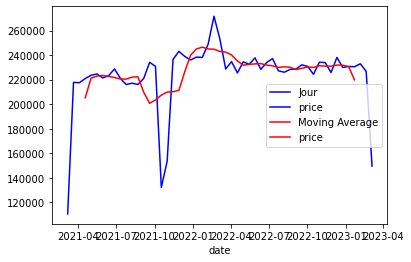

In [39]:
w2 = dp.resample("2W").sum()
rw2 = w2.rolling(window = 7, center = True).mean()
sns.lineplot(data = w2, palette=['b'], label = "Jour")
sns.lineplot(data = rw2, palette=['r'], label = "Moving Average")

### Evolution du CA à travers les jours

<AxesSubplot:xlabel='date'>

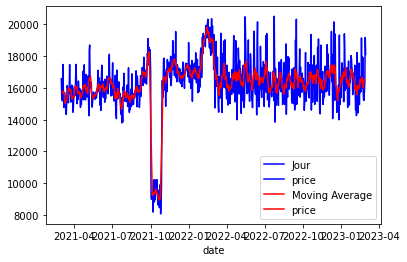

In [40]:
d = dp.resample("D").sum()
rd = d.rolling(window = 7, center = True).mean()
sns.lineplot(data = d, palette=['b'], label = "Jour")
sns.lineplot(data = rd, palette=['r'], label = "Moving Average")

#### *RECAP*

#### *J'ai 3 années calendaires mais 24 mois, car l'année 2021 ne comporte pas les mois de janvier et février et l'année 2023 comporte seulement les mois de janvier et février.*

#### *L'année 2022 est la meilleure année en terme de CA et elle à une année complète de ventre.*
#### *L'année 2023 est la moins bonne en terme de CA et elle a seulement 2 mois de ventes.*

#### *Quand on regarde plus en détails les différentes CA fait sur les différentes mois, l'on constate que les CA oscillent constamment entre 450 000 et 550 000.*
#### *Mais il y a eu une grosse baisse de CA en octobre 2021 <font color='red'>(pas de transactions entre le 2 et le 27 octobre 2021)</font> et le mois suivants une grosse augmentation cela est du à la catégorie 1.*
#### *Après la grosse remontée il y a un légère baisse et ensuite l'évolution devient très discrète pour finir par rechuter.*

#### *Il y a en fin d'année 2021 (fêtes de fin d'années ?) et le début de l'année 2022 (soldes d'hiver ?) une tendence à la hausse.*

#### *Le CA va ensuite baisser et "ocillier" entre 517 000 et 493 000, jusqu'à baisser à 456 000 pour le mois de février 2023.*

#### *En regardant avec des graphiques et en utilisant en plus des moyennes mobiles, l'on constate que le CA évolue avec peu de variation, Il y a quand même la grande variation qui à lieu sur la période septembre/octobre/novembre 2021.*
#### *La tendence est à la hausse.*

In [41]:
#sns.lineplot(data=dp.loc["2022"]["price"])
#sns.lineplot(data=dp.loc["2022-05": "2022-07"]["price"])
#dp.loc["2022"]["price"].resample("M").sum().plot(kind="line")
#dp.loc["2022"]["price"].resample("M").agg(["mean", "sum", "min", "max"])
#dp.loc["2022"]["price"].resample("M").agg(["mean", "sum", "min", "max"]).plot(kind="line")

***

***

## <center>Zoom sur les références</center>

In [42]:
len(dfcopy["id_prod"])

679332

In [43]:
dfcopy.head(5)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,hours,minutes,day,month,year,ages_range
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0,13,21,20,5,2022,31-40
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0,7,55,2,2,2022,31-40
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0,15,44,18,6,2022,51-60
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0,4,19,24,6,2021,17-25
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0,8,22,11,1,2023,41-50


Comme vu plus haut les références commencent toutes par un chiffre (0, 1 ou 2), qui rapelle sa catégories.

### Les 10 références les plus vendues

In [44]:
refe_valuecount = dfcopy["id_prod"].value_counts()
refe_valuecount = pd.DataFrame(refe_valuecount)
refe_valuecount.nlargest(10, columns = ["id_prod"])

,id_prod
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
1_403,1960
1_412,1951
1_413,1945
1_406,1939
1_407,1935


### Les 10 références les moins vendues

In [45]:
refe_valuecount.nsmallest(10, columns = ["id_prod"])

,id_prod
0_1633,1
0_807,1
0_1683,1
0_541,1
0_1379,1
0_886,1
0_1498,1
0_1728,1
0_549,1
0_2201,1


### Les références qui ont générés le plus de CA

In [46]:
ca_categ = pd.crosstab(dfcopy['price'].sum(), dfcopy['categ'], dfcopy["price"], aggfunc = "sum")
ca_categ

categ,0.0,1.0,2.0
row_0,,,
11856820.47,4422822.76,4653722.69,2780275.02


<AxesSubplot:xlabel='categ'>

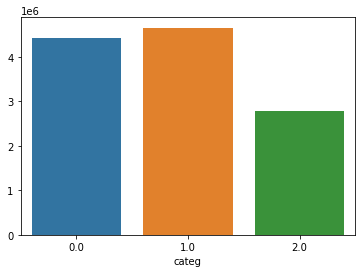

In [47]:
sns.barplot(data=ca_categ)

### Les références les plus présentes en nombres

<AxesSubplot:xlabel='categ', ylabel='count'>

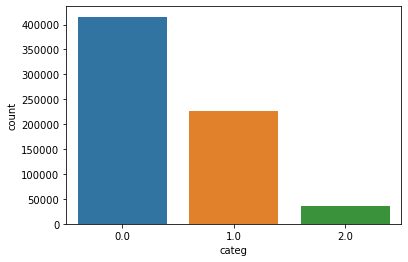

In [48]:
sns.countplot(x = "categ", data = dfcopy)

<AxesSubplot:xlabel='categ', ylabel='price'>

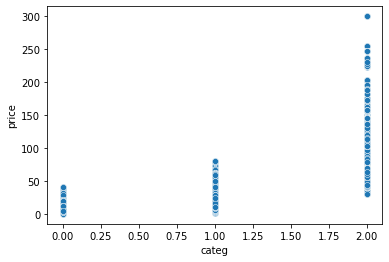

In [49]:
sns.scatterplot(data=dfcopy, x="categ", y="price")

<AxesSubplot:xlabel='prices_range', ylabel='count'>

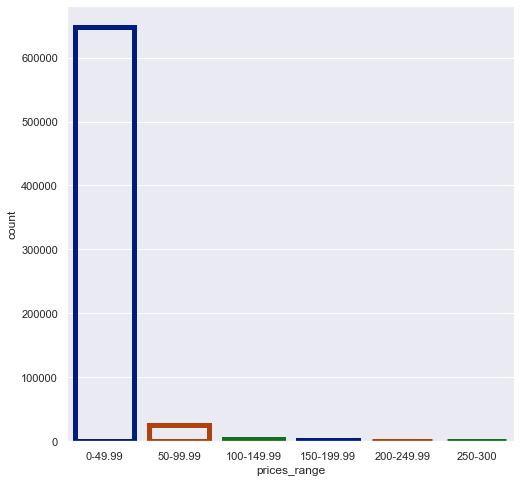

In [50]:
def price_range(price):
    step = [
        {'range': (0,49.99), 'val': '0-49.99'},
        {'range': (50,99.99), 'val': '50-99.99'},
        {'range': (100,149.99), 'val': '100-149.99'},
        {'range': (150,199.99),'val': '150-199.99'},
        {'range': (200,249.99),'val': '200-249.99'},
        {'range': (250,300),'val': '250-300'}]


    for i in step:
        if i['range'][0] <= price <= i['range'][1]:
            return i['val']

df['prices_range'] = df['price'].apply(price_range)

sns.set(rc={"figure.figsize":(8, 8)}) #width=3, #height=4
sns.countplot(x="prices_range", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

In [51]:
dfcopy = df.copy()

#### *RECAP*

#### *Les 10 réf les plus vendues (quantité) sont des 1.*
#### *Les 10 réf les moins vendues (quantité) sont des 0.*
#### *Les références qui générés le plus de CA sont d'abord des 1 ensuite des 0 et des 2.*
#### *Les références les plus présentes en nombres sont des 0 ensuite des 1 et des 2.*

***

***

## <center>Infos sur les profils clients</center>

In [52]:
dfcopy.head(10)

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,hours,minutes,day,month,year,ages_range,prices_range
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0,13,21,20,5,2022,31-40,0-49.99
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0,7,55,2,2,2022,31-40,0-49.99
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0,15,44,18,6,2022,51-60,0-49.99
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0,4,19,24,6,2021,17-25,50-99.99
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0,8,22,11,1,2023,41-50,0-49.99
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,f,1972,50,8.57,0.0,15,59,20,10,2022,41-50,0-49.99
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782,m,1981,41,11.99,0.0,4,45,3,6,2022,41-50,0-49.99
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456,f,1985,37,7.04,0.0,14,48,26,6,2021,31-40,0-49.99
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363,f,1982,40,12.79,0.0,12,27,27,12,2022,31-40,0-49.99
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847,m,1973,49,13.99,1.0,15,54,29,11,2021,41-50,0-49.99


### Repartition du CA par sex

<AxesSubplot:xlabel='sex', ylabel='count'>

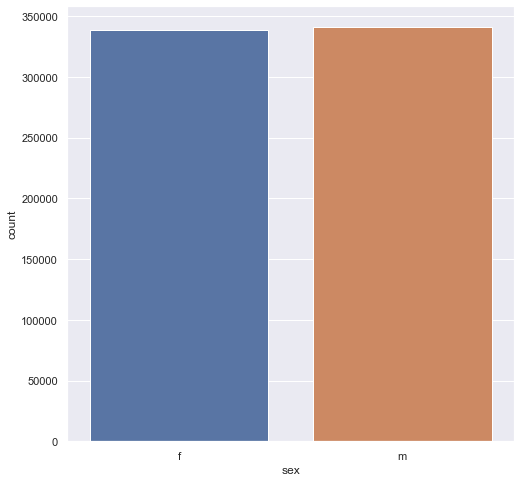

In [53]:
sns.countplot(x = "sex", data = dfcopy)

In [54]:
dfcopy["sex"].value_counts()

m    340930
f    338402
Name: sex, dtype: int64

*Il y a presque autant de femmes que d'hommes (il y a 2541 d'hommes de plus que de femmes).*

### Repartition du CA par tranches d'âges.

<AxesSubplot:xlabel='ages_range', ylabel='count'>

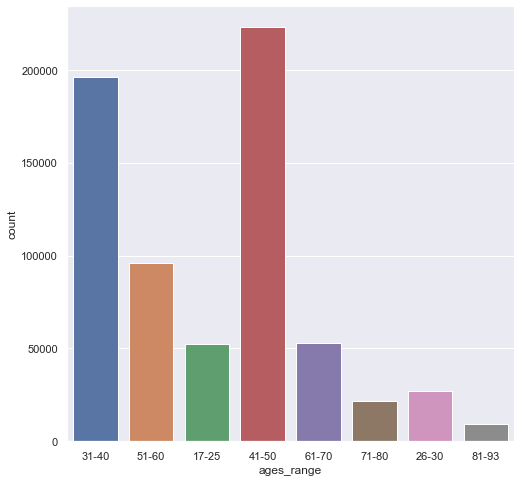

In [55]:
sns.countplot(x = "ages_range", data = dfcopy)

*Les 3 tranches d'âges les plus présentes sont les 41-50, les 31-40 et les 51-60.*

### Repartition du CA par sex et tranches d'âges.

<AxesSubplot:xlabel='ages_range', ylabel='count'>

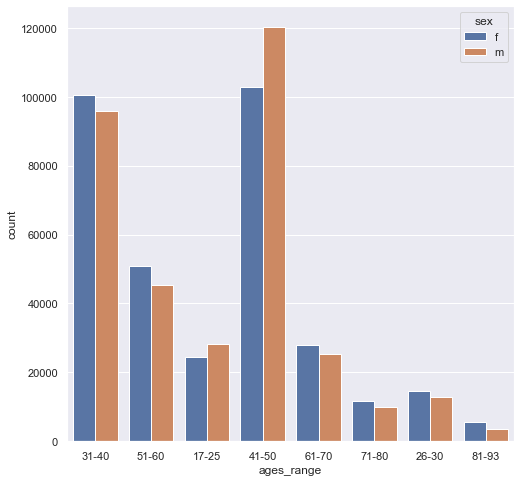

In [56]:
sns.countplot(x = "ages_range", hue = "sex", data = dfcopy)

*Les hommes sont majoritaires dans les tranches d'âges 41-50 et 17-25.*

### Repartition du CA par tranches d'âges et catégories.

<AxesSubplot:xlabel='ages_range', ylabel='count'>

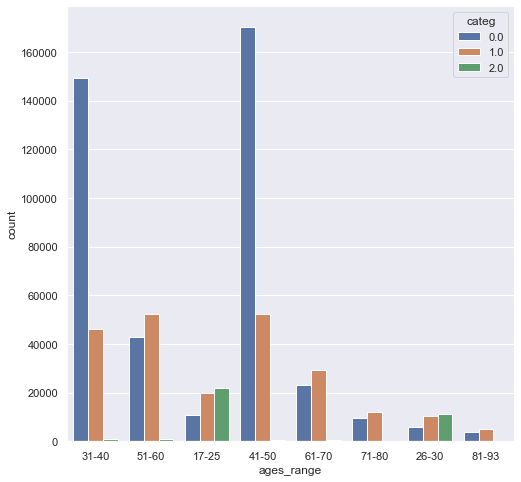

In [57]:
sns.countplot(x = "ages_range", hue = "categ", data = dfcopy)

*La catégories 0 est présente pour les 41-50 et 31-40.*

*La catégories 1 est majoritaire pour les autres tranches d'âges mais de manière bien moins significative.*

### Repartition du CA par tranches d'âges et sex.

<AxesSubplot:xlabel='ages_range', ylabel='count'>

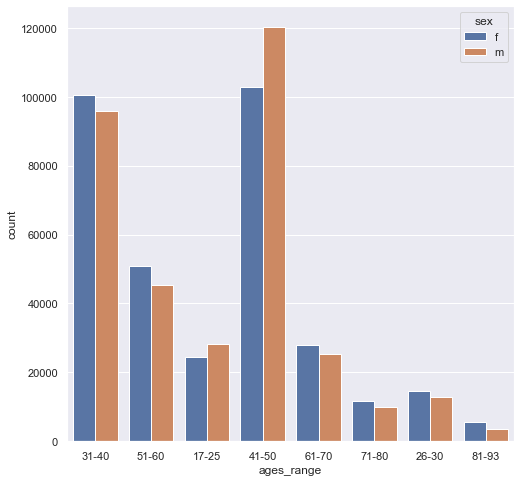

In [58]:
sns.countplot(x = "ages_range", hue = "sex", data = dfcopy)

*Les hommes sont beaucoup plus représentés que les femmes dans la tranches 41-50.*

### Repartition du CA par sex et categ

In [59]:
xx = pd.crosstab(dfcopy.categ, dfcopy.sex, values = dfcopy.price, aggfunc = "sum")
xx

sex,f,m
categ,,
0.0,2191649.90,2231172.86
1.0,2358417.02,2295305.67
2.0,1311253.04,1469021.98


<AxesSubplot:xlabel='categ'>

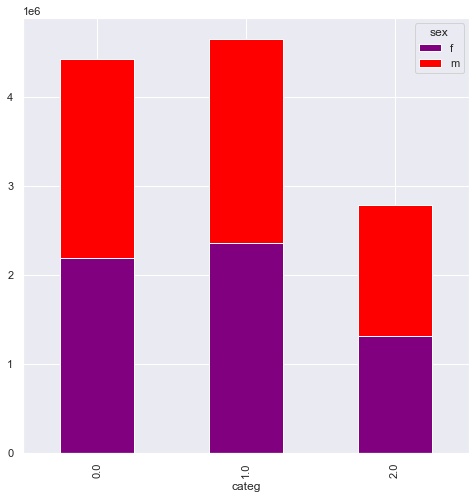

In [60]:
xx.plot(kind='bar', stacked=True, color=['purple', 'red', 'green'])

*Il y a une légère différence, les hommes représentent plus.*

### Repartition du CA par tranches d'âge et categ

In [61]:
xx = pd.crosstab(dfcopy.ages_range, dfcopy.categ, values = dfcopy.price, aggfunc = "sum")
xx

categ,0.0,1.0,2.0
ages_range,,,
17-25,115670.88,405076.71,1670174.96
26-30,62219.38,210020.85,831759.36
31-40,1592731.07,941086.57,66618.37
41-50,1804855.64,1066262.32,67681.91
51-60,455873.43,1076773.85,81718.23
61-70,247518.09,602966.58,41735.32
71-80,101507.48,244042.46,13733.67
81-93,42446.79,107493.35,6853.20


<AxesSubplot:xlabel='ages_range'>

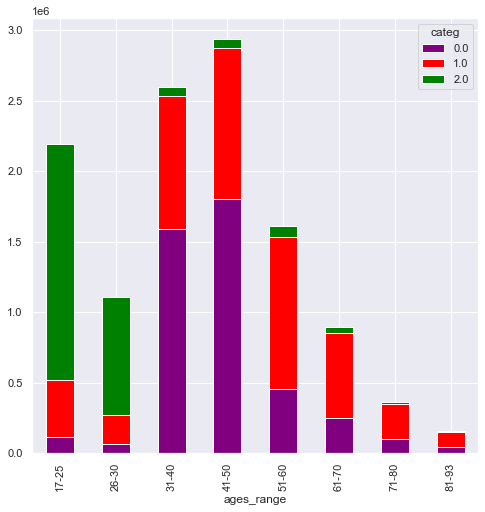

In [62]:
xx.plot(kind='bar', stacked=True, color=['purple', 'red', 'green'])

### Repartition du CA par tranches d'âge et sex

In [63]:
xx = pd.crosstab(dfcopy.ages_range, dfcopy.sex, values = dfcopy.price, aggfunc = "sum")
xx

sex,f,m
ages_range,,
17-25,971624.14,1219298.41
26-30,581982.34,522017.25
31-40,1331706.84,1268729.17
41-50,1360790.50,1578009.37
51-60,854645.46,759720.05
61-70,468676.99,423543.00
71-80,196338.25,162945.36
81-93,95555.44,61237.90


<AxesSubplot:xlabel='ages_range'>

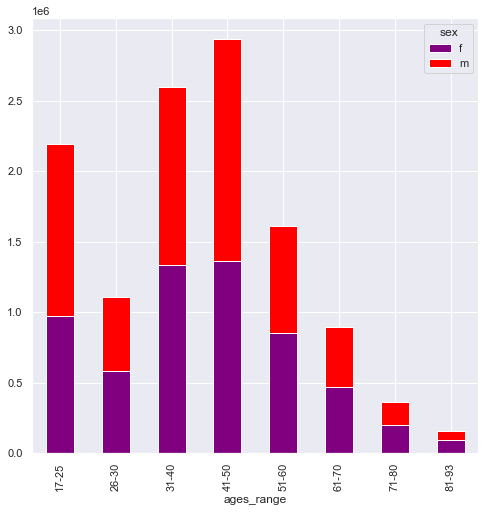

In [64]:
xx.plot(kind='bar', stacked=True, color=['purple', 'red', 'green'])

***

***

## <center>La répartition du CA entre les clients (courbe de Lorenz)</center>

*La courbe de Lorenz est une représentation graphique de la distribution d'une variable.*
*Ici nous voulons voir comment ce présente la répartition du CA entre les clients.*
*Il faut pour construire une courbe de Lorenz que l'axis x représente la population de 0 à 100% (0 à 1) et que l'axis y représente le pourcentage cumulée du CA.*

In [65]:
#Création d'un dataset ayant pour client_id unique la somme en CA qu'il représente et comme seul colonne "price".

lorenz = dfcopy.groupby(by=["client_id"]).sum()
lorenz.drop(["birth", "categ", "hours", "minutes", "day", "month", "year", "age"], axis = 1, inplace = True)
#lolo = lorenz.copy()

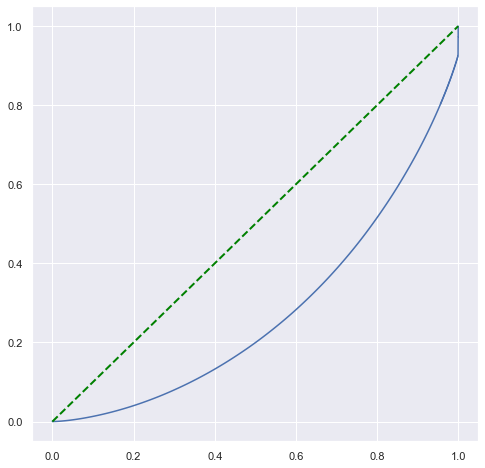

In [66]:
#Ensuite il a fallut que je récupère la colonne "price"
#Puis que je créer un variable dans laquelle je stock la longeur du nouveau lorenz (pour faire un linespace).
#Enfin je fais le cumul des "price", je les trie par ordre croissant et je fini par les normaliser (avoir un ordonnée qui va de 0 à 1), en divisent le tout par "lorenz.sum()".
#Je rajoute de quoi permettre à la courbe de bien commencer à 0

lorenz = lorenz['price']
n = len(lorenz)
lorenz = np.cumsum(np.sort(lorenz)) / lorenz.sum()
lorenz = np.append([0],lorenz)

#Je créer l'axis x via linspace et je fais apparaitre le graphique.

#plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Création de l'axis x allant de 0 à 1
plt.plot(xaxis, lorenz,drawstyle='steps-post') #Plot des valeurs le x axis (xaxis) représente la population de 0 à 1 et le y axis (lorenz) représente le cumul.
plt.plot([0, 1], [0, 1],color='green',
         linestyle='dashed',linewidth=2)#Création d'une droite (la droite d'égalité)
plt.show()

In [67]:
lorenz.sum()

2380.9848750497285

*L'indice de Gini calculé ci-dessous permet de connaite l'air de la surface entre la droite et la courbe de Lorenz.*

*Cet indice va de 0 à 1.*

*0 représente une répartition parfaitement égalitaire.*

*1 représente une répartition parfaitement inégalitaire.*

In [68]:
# Il faut d'abord calculer la surface sous la courbe, ensuite sachant que la droite coupe en deux la surface total du graphique (qui est 1), il suffit de prendre
# la moitité (0.5) et d'y soustraire la surface sous la courbe.

#AUC veut dire Area Under Curve
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Surface sous la courbe de Lorenz.
S = 0.5 - AUC # air de la surface entre la droite et la courbe de Lorenz
gini = 2*S
gini

0.446398866267505

***

***

***Sauvegarde des modifications apportées au dataset***

In [69]:
df.to_csv('df_post_antoine.csv')